# Figure 1: Strand bias in Nanopore direct-cDNA sequencing

**Summary:**<br>

This notebook compiles the scripts that were used to generate the Figure 1.

- **Panels a & d:** Measure of strand bias in direct-cDNA experiments

- **Panel b:** Measure of base quality in 5' soft-clip region and alignment region

---

<br>

## Import libraries

In [1]:
import pysam
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

## Settings for saving figures as pdf

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Opening Dataset file

In [3]:
# Open dataset generated as part of the pre-processing step

dataset = pd.read_csv('dataset_+SL_+hairpin.tsv', sep='\t')

<br>

# Panels a & d: Measure of strand bias in direct-cDNA experiments

In [4]:
strand_bias = pd.DataFrame()

idx=0

# count number of sense and antisense reads per run
for ID, reads in dataset.groupby('run'):
    
    strand_bias.loc[idx,'run'] = ID
    
    sense = len(reads[reads['read_orientation'] == 'sense'])
    strand_bias.loc[idx,'sense'] = sense
    
    antisense = len(reads[reads['read_orientation'] == 'antisense'])
    strand_bias.loc[idx,'antisense'] = antisense
    
    idx = idx+1

# Add new columns
strand_bias['total'] = strand_bias['sense'] + strand_bias['antisense']
strand_bias['%sense'] = round(strand_bias['sense'] / strand_bias['total'] * 100, 2)
strand_bias['%antisense'] = round(strand_bias['antisense'] / strand_bias['total'] * 100, 2)

# set columns type
col_types = {'run':object, 'sense':int, 'antisense':int, 'total':int, '%sense':float, '%antisense':float}
strand_bias = strand_bias.astype(col_types)

# order rows based on runs
runs = ['SSP_1', 'SSP_2', 'SSP_3', 'SSP_4', 'SSP_5', 'SSP_6', 'SL1_1', 'NP_1', 'NP_2', 'NP_3', 'NP_4', 'NP_5']
strand_bias['run'] = pd.Categorical(strand_bias['run'], categories = runs)
strand_bias = strand_bias.sort_values(by = 'run')

In [5]:
strand_bias

,run,sense,antisense,total,%sense,%antisense
6,SSP_1,15288,841123,856411,1.79,98.21
7,SSP_2,6428,259003,265431,2.42,97.58
8,SSP_3,14821,199942,214763,6.90,93.10
9,SSP_4,20392,308479,328871,6.20,93.80
10,SSP_5,2820,73012,75832,3.72,96.28
11,SSP_6,40112,479990,520102,7.71,92.29
5,SL1_1,1606790,4404901,6011691,26.73,73.27
0,NP_1,1856,103800,105656,1.76,98.24
1,NP_2,33956,1923233,1957189,1.73,98.27
2,NP_3,5400,391747,397147,1.36,98.64


In [6]:
# Enter raw data
SSP_sense = np.array(strand_bias[strand_bias['run'].str.contains('SSP')]['%sense'])
SL1_sense = np.array(strand_bias[strand_bias['run'].str.contains('SL1')]['%sense'])
NP_sense = np.array(strand_bias[strand_bias['run'].str.contains('NP')]['%sense'])

SSP_antisense = np.array(strand_bias[strand_bias['run'].str.contains('SSP')]['%antisense'])
SL1_antisense = np.array(strand_bias[strand_bias['run'].str.contains('SL1')]['%antisense'])
NP_antisense = np.array(strand_bias[strand_bias['run'].str.contains('NP')]['%antisense'])

# Calculate the average
SSP_sense_mean = np.mean(SSP_sense)
SL1_sense_mean = np.mean(SL1_sense)
NP_sense_mean = np.mean(NP_sense)

SSP_antisense_mean = np.mean(SSP_antisense)
SL1_antisense_mean = np.mean(SL1_antisense)
NP_antisense_mean = np.mean(NP_antisense)

# Calculate the standard deviation
SSP_sense_std = np.std(SSP_sense)
SL1_sense_std = np.std(SL1_sense)
NP_sense_std = np.std(NP_sense)

SSP_antisense_std = np.std(SSP_antisense)
SL1_antisense_std = np.std(SL1_antisense)
NP_antisense_std = np.std(NP_antisense)

# Create lists for the plot
experiments = ['SSP primer', 'SL1 primer', 'No Primer']
x_pos = np.arange(len(experiments))

mean_sense = [SSP_sense_mean, SL1_sense_mean, NP_sense_mean]
error_sense = [SSP_sense_std, SL1_sense_std, NP_sense_std]

mean_antisense = [SSP_antisense_mean, SL1_antisense_mean, NP_antisense_mean]
error_antisense = [SSP_antisense_std, SL1_antisense_std, NP_antisense_std]

In [7]:
summary_per_experiments = pd.DataFrame(dict( experiments=experiments, 
                                             sense_mean=mean_sense, sense_std=error_sense,
                                             antisense_mean=mean_antisense, antisense_std=error_antisense))


summary_per_experiments.columns = ['Experiments', 'Mean %Sense', 'Std Sense', 'Mean %Antisense', 'Std Antisense']

summary_per_experiments

,Experiments,Mean %Sense,Std Sense,Mean %Antisense,Std Antisense
0,SSP primer,4.79,2.263051,95.21,2.263051
1,SL1 primer,26.73,0.000000,73.27,0.000000
2,No Primer,1.64,0.149533,98.36,0.149533


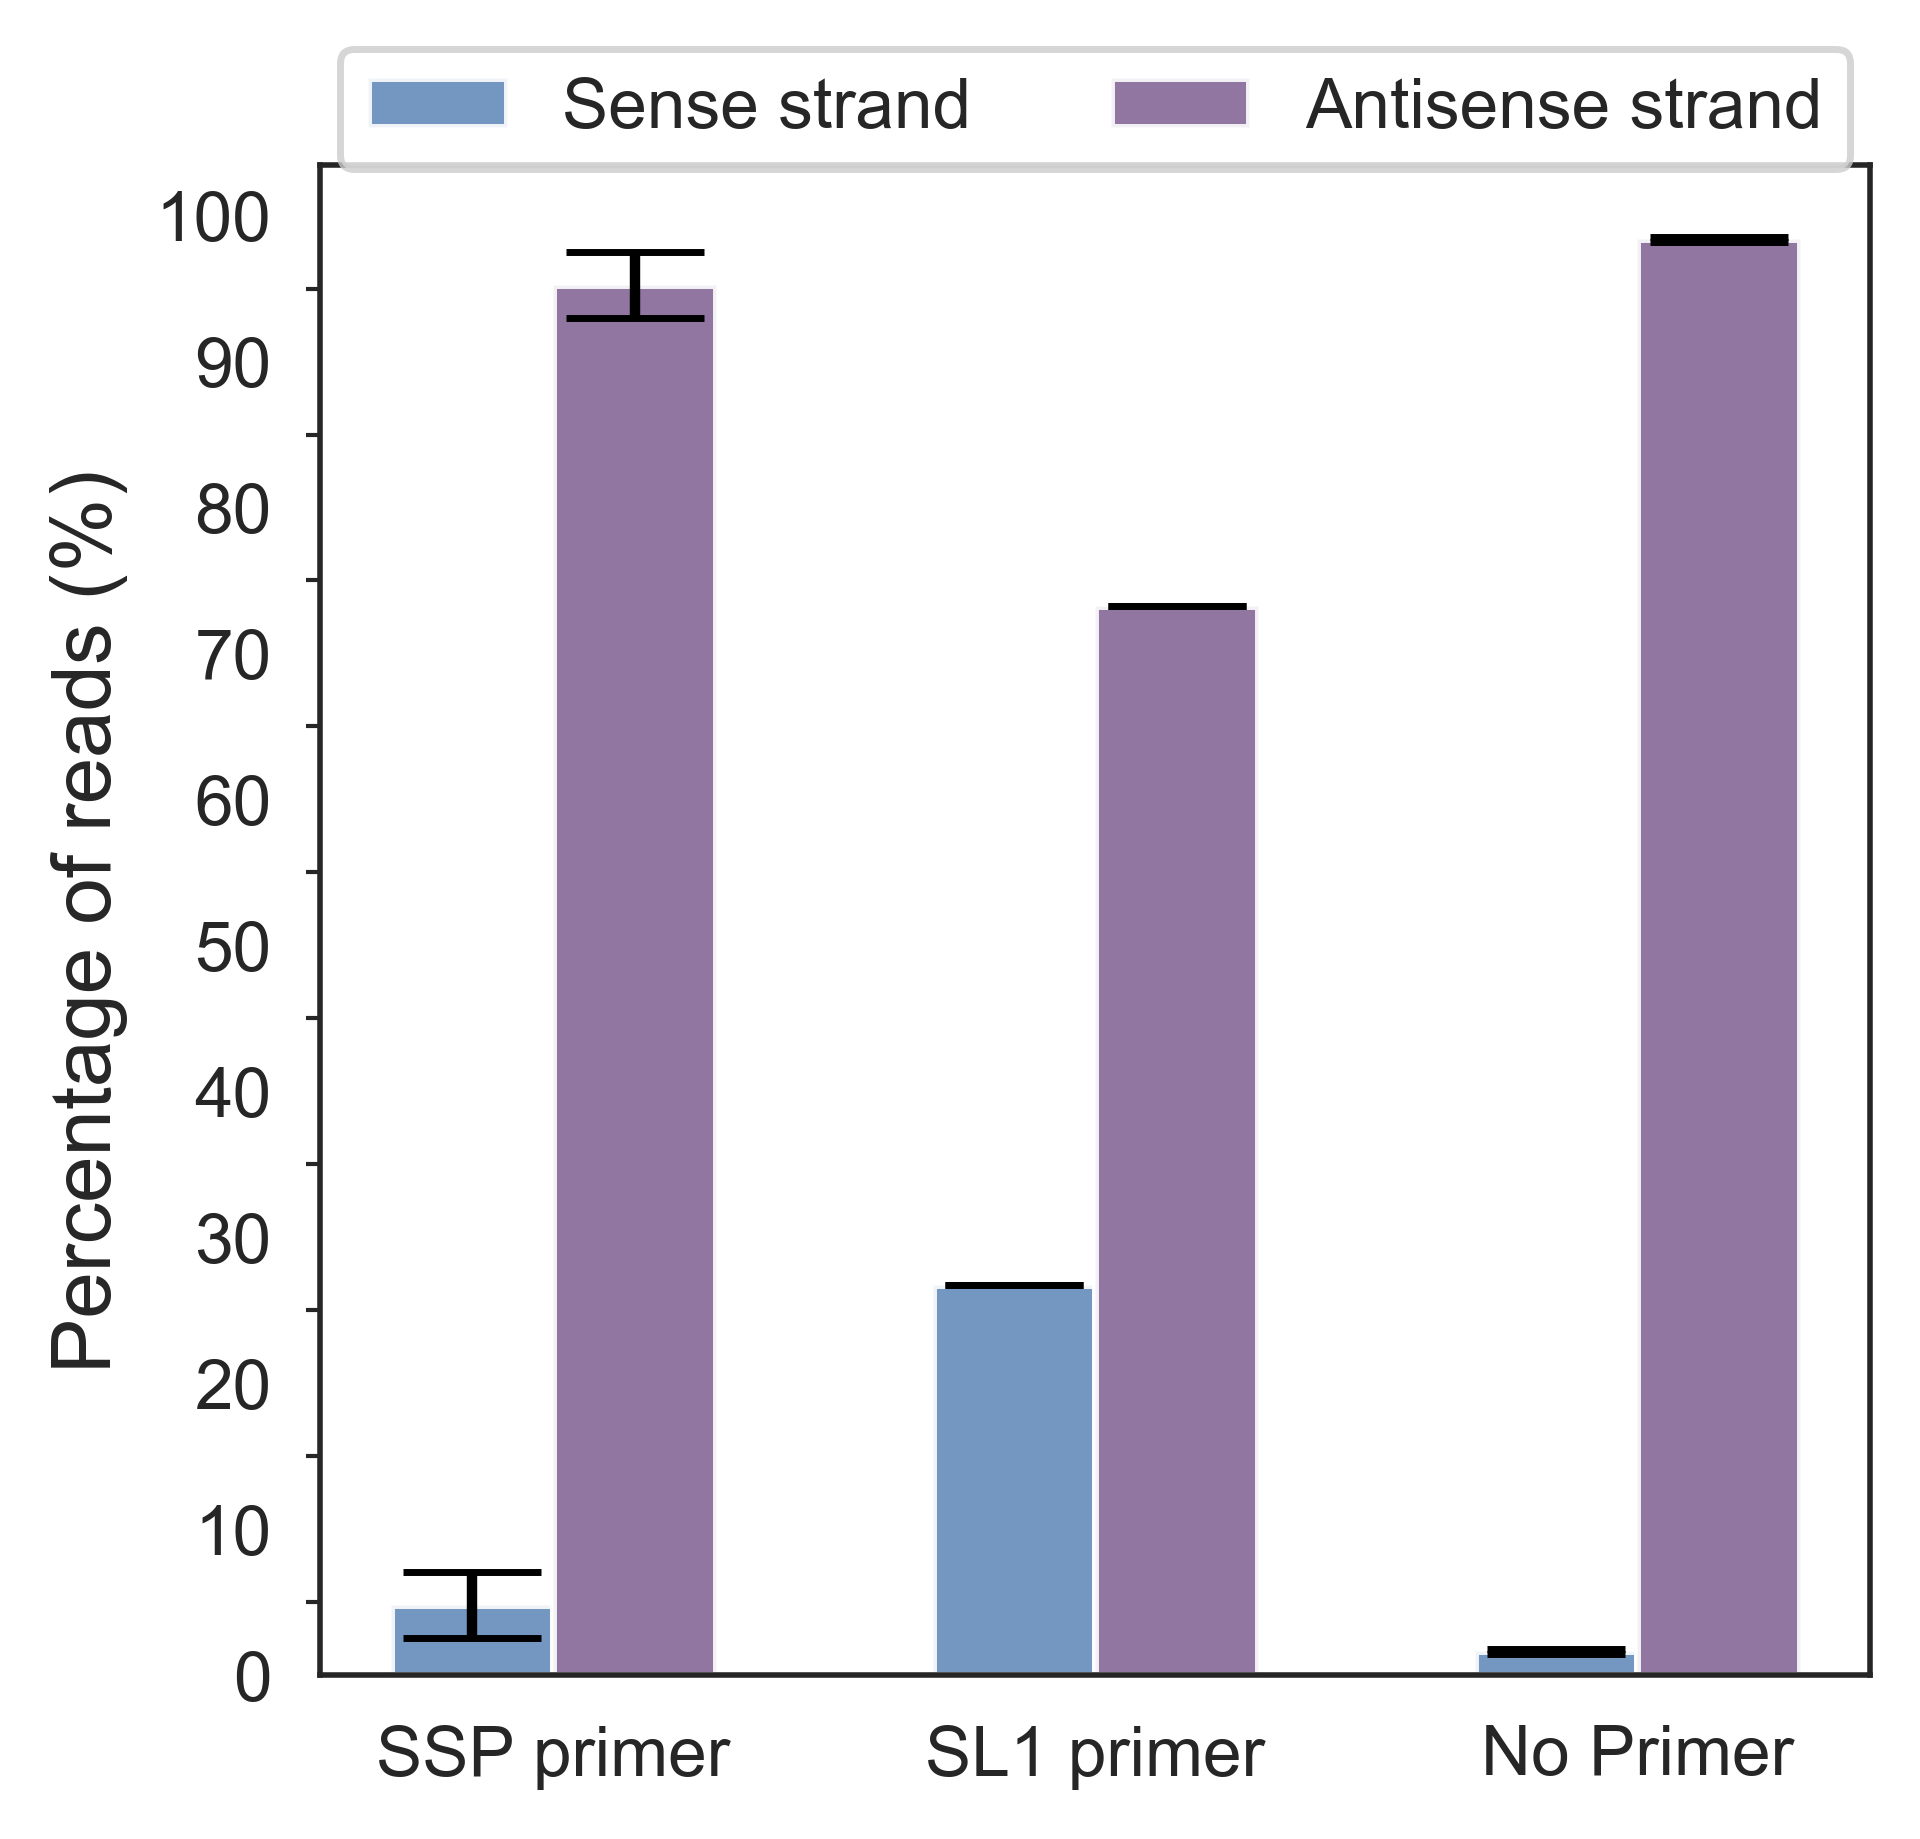

In [8]:
%matplotlib inline

# initialization of plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(4,4), dpi=500)
width = 0.3

# data
sense = ax.bar(x_pos- width/2, mean_sense, yerr=error_sense, align='center', alpha=0.9, ecolor='black', capsize=10, width=width, color='#658cbb',label='Sense strand')
antisense = ax.bar(x_pos+ width/2, mean_antisense, yerr=error_antisense, align='center', alpha=0.9, ecolor='black', capsize=10, width=width, color='#856798',label='Antisense strand')

# plots settings
ax.set_ylabel('Percentage of reads (%)', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(experiments)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='y', which='minor', left=True)
l = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.tight_layout()

# save
plt.savefig('Fig1.a&d-strand_bias.pdf', dpi=500, bbox_inches='tight')

<font size="4">**Figure 1.a & 1.d:**<br></font>
Measure of strand bias in different direct-cDNA sequencing experiments. During library preparation, 2nd strand synthesis was either performed with the primer provided in the kit (SSP Primer), a SL1-specific primer (SL1 primer) or no primer at all (No Primer).

<br>

# Panel b: Base quality between 5' soft-clip region and aligned region

In [9]:
# Function for averaging values from a nested list
# Allows to get the mean base quality at any given position

def avgNestedLists(nested_vals):
    
    output = []
    maximum = 0
    for lst in nested_vals:
        if len(lst) > maximum:
            maximum = len(lst)
    
    for index in range(maximum): # Go through each index of longest list
        temp = []
        for lst in nested_vals: # Go through each list
            if index < len(lst): # If not an index error
                temp.append(lst[index])
        output.append(np.nanmean(temp))
    return output

In [10]:
# Function for: 
# 1) extracting base quality value 
# 2) plotting average base quality value per position (relative to alignment start)

def extract_BaseQuality(alignments):
    
    total = 0
    aligned = []
    unaligned = []
    
    # loop over alignments
    for read in alignments:
        
        # only look primary alignments
        if not read.is_unmapped and not read.is_secondary and not read.is_supplementary and read.seq is not None:
            
            quali = read.query_qualities
            
            # filter for antisense reads
            if quali is not None and read.is_reverse:

                start = read.query_alignment_start
                end = read.query_alignment_end

                # filter for long soft-clips
                if start > 80:

                    # aligned region
                    aligned_qual = list(quali[start:end])
                    aligned.append(aligned_qual)

                    # unaligned (= softclip) region
                    sc_qual = list(quali[:start])
                    sc_qual.reverse()
                    unaligned.append(sc_qual)
                    
                    # count reads
                    total = total+1
                    
    
    # averaged values
    avgAligned = avgNestedLists(aligned)
    
    avgUnaligned = avgNestedLists(unaligned)
    avgUnaligned.reverse()

    # base quality on Y axis
    avg = avgUnaligned + avgAligned

    # X axis values (= base position relative to alignment start)
    xUnaligned = [i for i in range(-len(avgUnaligned), 1)]
    xAligned = [i for i in range(0, len(avgAligned))]
    
    # Y axis values (= average value)
    yUnaligned = avg[:len(avgUnaligned)+1]
    yAligned = avg[len(avgUnaligned):]
    
    return total, xUnaligned, xAligned, yUnaligned, yAligned


In [11]:
# This was run on the first direct-cDNA experiment (run SSP_1)

ID = 'SSP_1'
file = f'/Volumes/elegans/rna_sequencing/{ID}/{ID}-transcriptome_sorted.bam'
alignment = pysam.AlignmentFile(file,'rb')

total, xUnaligned, xAligned, yUnaligned, yAligned = extract_BaseQuality(alignment)

print(f'Total number of reads used for calculating base quality: {total} reads')

Total number of reads used for calculating base quality: 801484 reads


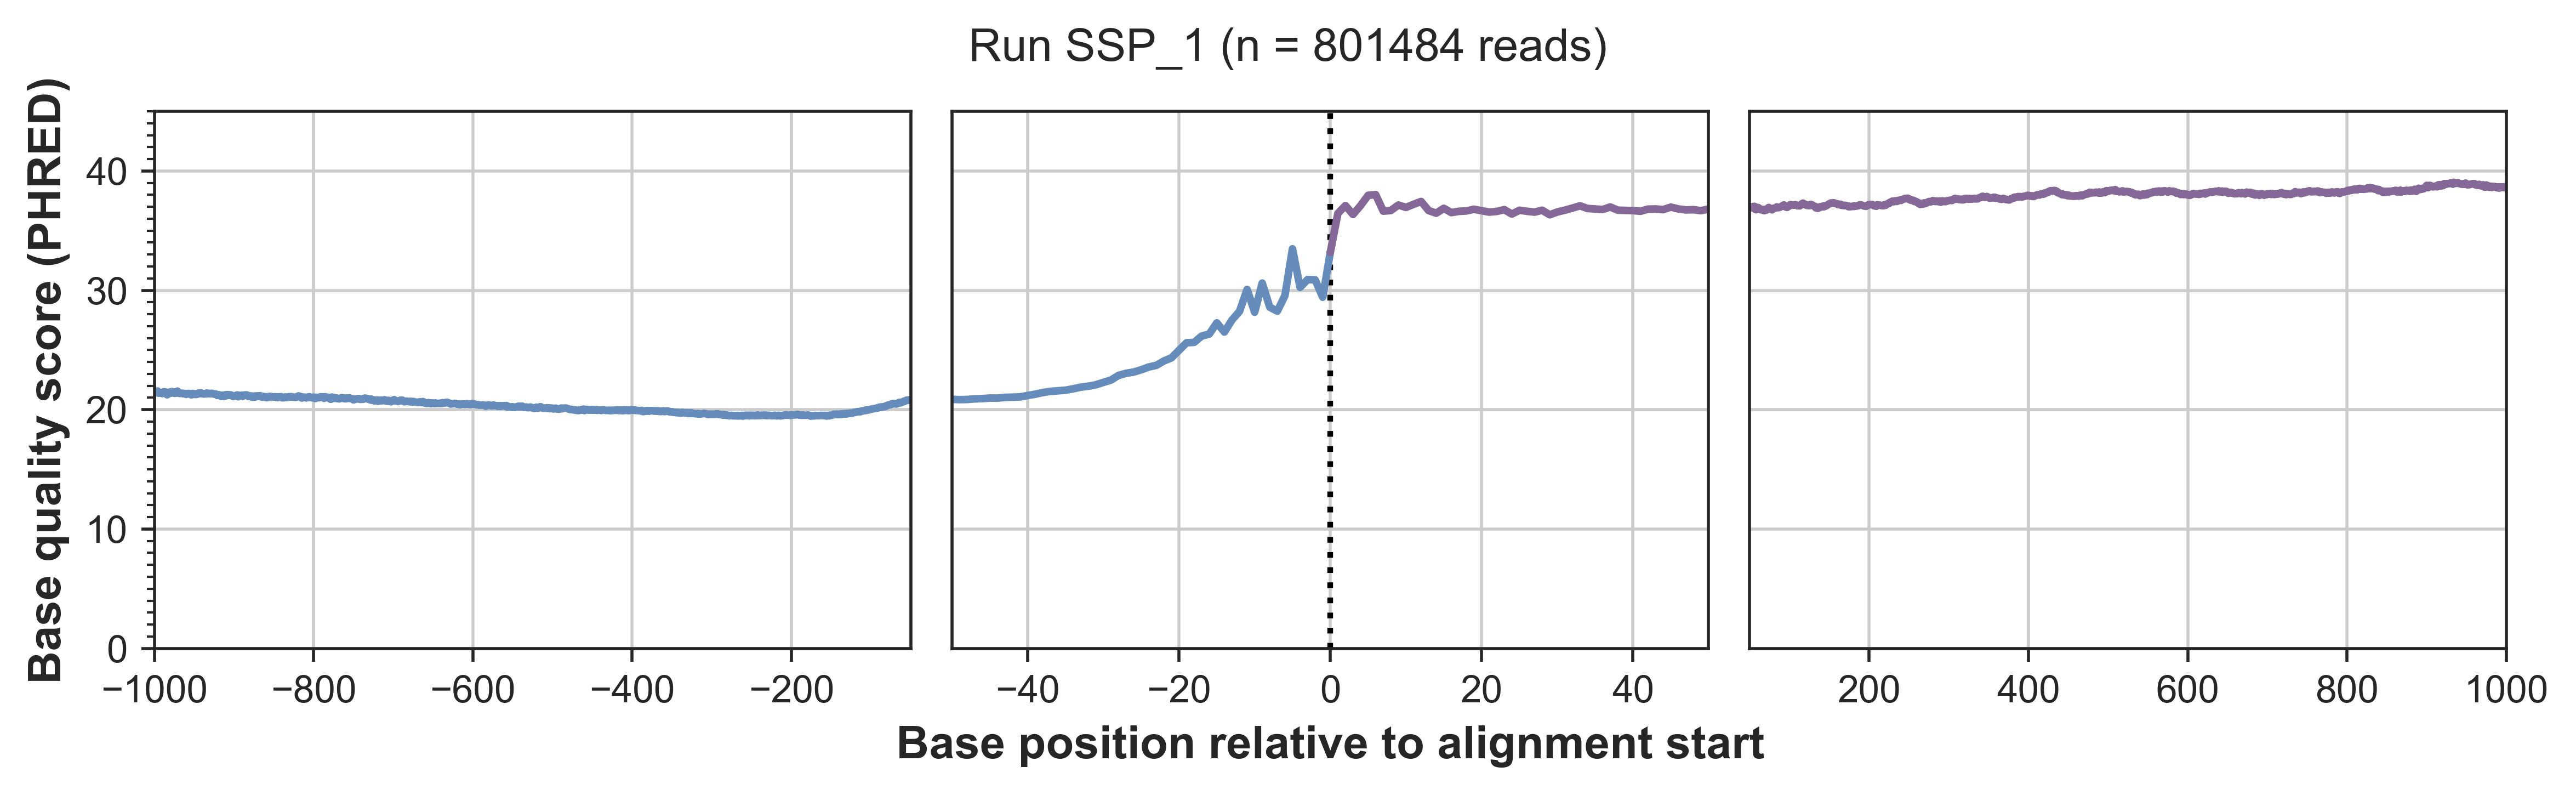

In [12]:
%matplotlib inline

sns.set_style('whitegrid', {'axes.edgecolor': '.15', 'axes.linewidth': '1.5', "xtick.major.size": 8, "ytick.major.size": 8, "xtick.minor.size": 5, "ytick.minor.size": 5})

fig, ax = plt.subplots(figsize=(9.5,3), nrows=1, ncols=3, sharey=True, dpi=500)

# unaligned region
ax[0].plot(xUnaligned, yUnaligned, color='#658cbb', alpha=1, label='Unaligned region',linewidth=2)
ax[0].set_xlim(-1000,-50)
ax[0].tick_params(axis='y', which='both', left=True)
ax[0].yaxis.set_minor_locator(MultipleLocator(1))
ax[0].tick_params(axis='x', which='major', bottom=True)
ax[0].set_ylabel('Base quality score (PHRED)', weight='bold', size=12)

# transition region
ax[1].plot(xUnaligned[-51:], yUnaligned[-51:], color='#658cbb', alpha=1, label='Unaligned region',linewidth=2)
ax[1].plot(xAligned[:51], yAligned[:51], color='#856798', alpha=1, label='Aligned region', linewidth=2)
ax[1].vlines(0, 0, 60, 'black', alpha=1, linewidth=1.5, linestyle='dotted')
ax[1].set_xlim(-50, 50)
ax[1].tick_params(axis='x', which='major', bottom=True)
ax[1].set_xlabel('Base position relative to alignment start', weight='bold', size=12)

# aligned region
ax[2].plot(xAligned[51:], yAligned[51:], color='#856798', alpha=1, label='Aligned region',linewidth=2)
ax[2].set_xlim(50, 1000)
ax[2].tick_params(axis='x', which='major', bottom=True)

# plot settings
plt.ylim(0, 45)
plt.subplots_adjust(left=0.1, bottom=None, right=0.98, top=None, wspace=0.01, hspace=None)


ID = 'Run SSP_1'
plt.suptitle(f'{ID} (n = {total} reads)', y=0.95)

fig.tight_layout()

# save plot
plt.savefig('Fig1.b-base_quality_(SSP_1).pdf', dpi=800, bbox_inches='tight')

<font size="4">**Figure 1.b:**<br></font>
Base quality measured in 5’ soft-clip (blue) and primary alignment (purple). We measured the average base quality value over 800K individual Nanopore reads.